<a href="https://colab.research.google.com/github/mihika073/Deeplearning/blob/main/Mihika__Assignment1_MLrefresh1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignment M1: Town Economic Data
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Mihika Srivastava
* Student ID (7 digit number): 3003306

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

**10 points each. 100 points**

  Use the file below to complete the following data wrangling and regression modeling. Good luck!


 0. Import Required Modules

In [ ]:
# import modules needed for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# Functions for regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# Functions for regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1.   Import the data, mount your Drive, print df.shape, and use df.info() to look for any missing values.

![MA image](https://upload.wikimedia.org/wikipedia/commons/7/7e/Towns_income_per_capita_in_MA.jpg)

Figure: Map of locations by per capita income. Areas with higher levels of income are shaded darker.

* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[2]
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$223,444","$164,063",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
#print df.shape()
print("This is the shape of the data :\n", df.shape, '\n') 
print("These are the column names: \n", df.columns, '\n') 
print("These are the data types: \n", df.dtypes)


This is the shape of the data :
 (297, 9) 

These are the column names: 
 Index(['Rank', 'Municipality', 'Type', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds'],
      dtype='object') 

These are the data types: 
 Rank                      int64
Municipality             object
Type                     object
County                   object
Per capitaincome         object
Medianhouseholdincome    object
Medianfamilyincome       object
Population                int64
Number ofhouseholds       int64
dtype: object


In [ ]:
#Look for missing values
df.info()
df.isnull().sum().sum() #missing value entire dataframe
df.isnull().sum() #missing value by column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    object
 5   Medianhouseholdincome  297 non-null    object
 6   Medianfamilyincome     297 non-null    object
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.0+ KB


Rank                     0
Municipality             0
Type                     0
County                   0
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64

# 2. Clean the data. Remove special characters like $ , and + and coerce appropriate columns to numeric.

In [ ]:
#data cleaning 
df['Per capitaincome']=df['Per capitaincome'].str.replace('[$,+]','')
df['Medianhouseholdincome']=df['Medianhouseholdincome'].str.replace('[$,+]','')
df['Medianfamilyincome']=df['Medianfamilyincome'].str.replace('[$,+]','')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,Town,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,Town,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,Town,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,City,Middlesex,73420,223444,164063,88593,78427


In [ ]:
#converting string to numeric
df["Per capitaincome"] = pd.to_numeric(df["Per capitaincome"])
df["Medianhouseholdincome"] = pd.to_numeric(df["Medianhouseholdincome"])
df["Medianfamilyincome"] = pd.to_numeric(df["Medianfamilyincome"])

In [ ]:
print(df.dtypes)
df['Type'].unique()

Rank                      int64
Municipality             object
Type                     object
County                   object
Per capitaincome          int64
Medianhouseholdincome     int64
Medianfamilyincome        int64
Population                int64
Number ofhouseholds       int64
dtype: object


array(['Town', 'City', 'Essex'], dtype=object)

In [ ]:
#Replace categorical variable to numerical
df['Type'].replace(['Town', 'City', 'Essex'],
                        [0, 1, 2], inplace=True)

# 3. Assign Y = to df['Per capitaincome'].


In [ ]:
#Assign Y 
Y=df["Per capitaincome"]
print(Y)
print(Y.shape) 
print('\n')
df.dtypes

0      105217
1       89476
2       82550
3       77585
4       73420
        ...  
292     19796
293     18133
294     16987
295     50637
296     35323
Name: Per capitaincome, Length: 297, dtype: int64
(297,)




Rank                      int64
Municipality             object
Type                      int64
County                   object
Per capitaincome          int64
Medianhouseholdincome     int64
Medianfamilyincome        int64
Population                int64
Number ofhouseholds       int64
dtype: object

# 4. Subset columns for modeling

* Type
* Population
* Number ofhouseholds

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [ ]:
columns = ['Type','Population','Number ofhouseholds']
X = df[columns]
print(X.shape)
print('\n')
X.head()


(297, 3)




,Type,Population,Number ofhouseholds
0,0,11261,10769
1,0,6279,5891
2,0,4301,3541
3,0,59180,38431
4,1,88593,78427


# 5. Split into X_train, X_test, y_train, y_test.
Use an 80/20 split, shuffle the data, and random state equal to YOUR STUDENT ID. Print the shape of X_train, X_test, y_train, y_test.

Convert X_train, X_test, y_train and y_test into numpy arrays. Just overwrite the variables with the numpy arrays like we did in class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.2,
                                                    shuffle=True, 
                                                    random_state=3003306)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(237, 3) (60, 3) (237,) (60,)


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 6. Use fit_transform() from MinMaxScaler on X_train. Use transform() to apply the MinMaxScaler to X_test.


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Fit a random forest model on X_train. Call your model object `clf`. 

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [ ]:
clf = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
train_preds = clf.predict(X_train) 
test_preds = clf.predict(X_test) 

# 1) R2 value - for Random Forest Regression
print("This is train R2 (clf):", r2_score(y_train, train_preds)) # train
print("This is test R2 (clf):", r2_score(y_test, test_preds)) #test

# 2) mae - for RF Regression
trainMAE_clf = mean_absolute_error(y_train, train_preds)
print("This is trainMAE (clf):", trainMAE_clf) # train
testMAE_clf = mean_absolute_error(y_test, test_preds)
print("This is testMAE (clf):", testMAE_clf) # test

This is train R2 (clf): 0.893251565476748
This is test R2 (clf): 0.25826787914439486
This is trainMAE (clf): 2769.0658649789034
This is testMAE (clf): 8094.4558333333325


# 8. Make two scatterplots of actual vs. predicted. One for train results, one for test results. 
With nicely labeled title and axis (like we did in class).

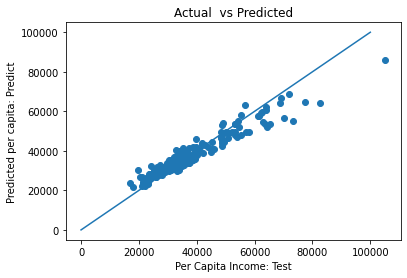

In [ ]:
#Train
plt.scatter(y_train, train_preds)
plt.plot(range(100000),range(100000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

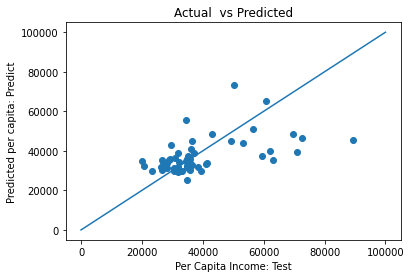

In [ ]:
#Test
plt.scatter(y_test, test_preds)
plt.plot(range(100000),range(100000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

# 9. Apply and evaluate your fitted model to ALL town-level data in Connecticut.

This will require you to prep this new dataset the same way as you did for Massachussetts. Luckily, you should be able to copy/paste most code! You can treat this as another holdout partition - use all rows but only the subset of columns that were used in your model. 

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

In [ ]:
#import ctData
ctData = pd.read_html('https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income')[2]
ctData

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


![CT econ data](https://upload.wikimedia.org/wikipedia/commons/6/6d/Connecticut_Towns_by_Median_Household_Income.png)

Figure: Map of municipalities by median household income (ACS 2015-2019). Areas with higher income are shaded more blue, areas with lower income are shaded more red.

*https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income

In [ ]:
#print ctData.shape()
print("This is the shape of the data :\n", ctData.shape, '\n') 
print("These are the column names: \n", ctData.columns, '\n') 
print("These are the data types: \n", ctData.dtypes)

This is the shape of the data :
 (179, 9) 

These are the column names: 
 Index(['Rank', 'Town', 'Unnamed: 2', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds'],
      dtype='object') 

These are the data types: 
 Rank                     float64
Town                      object
Unnamed: 2                object
County                    object
Per capitaincome          object
Medianhouseholdincome     object
Medianfamilyincome        object
Population                 int64
Number ofhouseholds        int64
dtype: object


In [ ]:
#Look for missing values
ctData.info()
ctData.isnull().sum().sum() #missing value entire dataframe
ctData.isnull().sum() #missing value by column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   177 non-null    float64
 1   Town                   179 non-null    object 
 2   Unnamed: 2             179 non-null    object 
 3   County                 177 non-null    object 
 4   Per capitaincome       179 non-null    object 
 5   Medianhouseholdincome  179 non-null    object 
 6   Medianfamilyincome     179 non-null    object 
 7   Population             179 non-null    int64  
 8   Number ofhouseholds    179 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 12.7+ KB


Rank                     2
Town                     0
Unnamed: 2               0
County                   2
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64

In [ ]:
#data cleaning 
ctData['Per capitaincome']=ctData['Per capitaincome'].str.replace('[$,+]','')
ctData['Medianhouseholdincome']=ctData['Medianhouseholdincome'].str.replace('[$,+]','')
ctData['Medianfamilyincome']=ctData['Medianfamilyincome'].str.replace('[$,+]','')
ctData.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,105846,174611,211875,19738,6857
1,2.0,Darien,Town,Fairfield,105846,208848,343456,20732,6555
2,3.0,Greenwich,Town,Fairfield,90087,128153,167825,61171,22083
3,4.0,Weston,Town,Fairfield,92794,219868,285612,10179,3379
4,5.0,Westport,Town,Fairfield,97395,181360,237353,26391,9740


In [ ]:
#converting string to numeric
ctData["Per capitaincome"] = pd.to_numeric(ctData["Per capitaincome"])
ctData["Medianhouseholdincome"] = pd.to_numeric(ctData["Medianhouseholdincome"])
ctData["Medianfamilyincome"] = pd.to_numeric(ctData["Medianfamilyincome"])

In [ ]:
print(ctData.dtypes)
ctData.rename(columns = {'Unnamed: 2':'Type'}, inplace = True)
print(ctData.dtypes)

Rank                     float64
Town                      object
Unnamed: 2                object
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object
Rank                     float64
Town                      object
Type                      object
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object


In [ ]:
ctData.head()

,Rank,Town,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,0,Fairfield,105846,174611,211875,19738,6857
1,2.0,Darien,0,Fairfield,105846,208848,343456,20732,6555
2,3.0,Greenwich,0,Fairfield,90087,128153,167825,61171,22083
3,4.0,Weston,0,Fairfield,92794,219868,285612,10179,3379
4,5.0,Westport,0,Fairfield,97395,181360,237353,26391,9740


In [ ]:
ctData['Type'].unique()


array(['Town', 'Borough', 'City', 'State', 'Country'], dtype=object)

In [ ]:
#Replace categorical variable to numerical
ctData['Type'].replace(['Town', 'Borough', 'City', 'State', 'Country'],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
print(ctData.dtypes)
print(ctData.shape)

Rank                     float64
Town                      object
Type                       int64
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object
(179, 9)


In [ ]:
#Assign Y 
Y_CT=ctData["Per capitaincome"]
print(Y_CT)
print(Y_CT.shape) 
print('\n')
ctData.dtypes

0      105846
1      105846
2       90087
3       92794
4       97395
        ...  
174     21110
175     21056
176     20272
177     19854
178     16798
Name: Per capitaincome, Length: 179, dtype: int64
(179,)




Rank                     float64
Town                      object
Type                       int64
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object

In [ ]:
columns_ct = ['Type','Population','Number ofhouseholds']
X_CT = ctData[columns_ct]
print(X_CT.shape)
print('\n')
X_CT.head()

(179, 3)




,Type,Population,Number ofhouseholds
0,0,19738,6857
1,0,20732,6555
2,0,61171,22083
3,0,10179,3379
4,0,26391,9740


In [ ]:
# convert these all to numpy arrays
X_CT_Test = X_CT.to_numpy()

In [ ]:
#minmaxScaler
scaler = MinMaxScaler()
X_CT_Test2 = scaler.fit_transform(X_CT_Test)
#X_CT_test = scaler.transform(X_CT_test)

In [ ]:
#Fit randomforest
clf = RandomForestRegressor(n_estimators=80, random_state=0)
clf = clf.fit(X_train, y_train)
#train_preds = clf.predict(X_train) 
#test_preds = clf.predict(X_test) 
#clf = clf.fit(X_CT_train, Y_CT_train)
#train_preds_ct = clf.predict(X_CT_train) 
test_preds_ct = clf.predict(X_CT_Test2) 
print(test_preds_ct)

# 1) R2 value - for Random Forest Regression
#print("This is train R2 (clf):", r2_score(Y_CT_train, train_preds)) # train
print("This is test R2 (clf):", r2_score(Y_CT, test_preds_ct)) #test

# 2) mae - for RF Regression
#trainMAE_clf = mean_absolute_error(Y_CT_train, train_preds)
#print("This is trainMAE (clf):", trainMAE_clf) # train
testMAE_clf = mean_absolute_error(Y_CT, test_preds_ct)
testMSE_clf = mean_squared_error(Y_CT, test_preds_ct)
print("This is testMAE (clf):", testMAE_clf) # test
print("This is testRMSE (clf):", testMSE_clf**.5)

[25557.9    25557.9    25557.9    25888.1    25557.9    25557.9
 25557.9    25557.9    25557.9    25557.9    25888.1    26167.5
 25888.1    26167.5    25888.1    26167.5    25888.1    25557.9
 25557.9    25557.9    25888.1    25557.9    25888.1    25888.1
 26167.5    25557.9    25888.1    26167.5    25888.1    25888.1
 25888.1    25557.9    25888.1    25888.1    25557.9    25557.9
 25888.1    27161.1625 25888.1    25557.9    26167.5    26167.5
 25557.9    27464.75   25888.1    25888.1    25888.1    26335.9375
 26167.5    25888.1    25557.9    25557.9    25557.9    25557.9
 25888.1    25888.1    25888.1    25557.9    25888.1    25557.9
 25888.1    25888.1    26167.5    25557.9    25888.1    25557.9
 25557.9    25888.1    25888.1    25169.65   25888.1    25557.9
 25888.1    26167.5    25888.1    25557.9    25557.9    25888.1
 25169.65   25557.9    26167.5    25557.9    25888.1    25557.9
 25888.1    25557.9    25557.9    25557.9    25888.1    25557.9
 26167.5    25888.1    25557.9    255

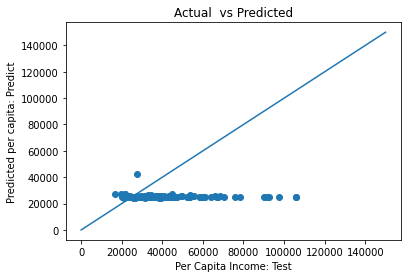

In [ ]:
#Test
plt.scatter(Y_CT, test_preds_ct)
plt.plot(range(150000),range(150000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

In [ ]:
df.describe()

,Rank,Type,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.797980,0.164983,37639.572391,77679.569024,93261.774411,20370.808081,9239.178451
std,87.134097,0.380770,12769.248281,29136.038674,31732.431659,42217.128219,17561.297606
min,1.000000,0.000000,16987.000000,30833.000000,36073.000000,75.000000,60.000000
25%,75.000000,0.000000,30466.000000,59186.000000,73496.000000,4398.000000,1544.000000
50%,152.000000,0.000000,34466.000000,72273.000000,86808.000000,11191.000000,4911.000000
75%,226.000000,0.000000,39414.000000,87900.000000,105821.000000,23726.000000,11226.000000
max,300.000000,2.000000,105217.000000,256300.000000,250000.000000,629182.000000,249414.000000


In [ ]:
ctData.describe()

,Rank,Type,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
count,177.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,1.790000e+02
mean,89.050847,0.324022,40122.955307,82198.195531,97701.050279,1.765114e+06,6.673667e+05
std,51.651616,0.746553,15369.112914,29425.226097,38810.061099,2.307524e+07,8.723234e+06
min,1.000000,0.000000,16798.000000,28970.000000,32820.000000,7.590000e+02,3.340000e+02
25%,45.000000,0.000000,31287.000000,64875.000000,77745.500000,4.853000e+03,1.924500e+03
50%,88.000000,0.000000,37283.000000,77673.000000,91893.000000,1.243500e+04,4.783000e+03
75%,134.000000,0.000000,43354.500000,89150.500000,107339.500000,2.605000e+04,9.020500e+03
max,178.000000,4.000000,105846.000000,219868.000000,343456.000000,3.087455e+08,1.167163e+08


# 10. Five good bullets
Write five good bullets about whether or not Massachussetts economic data was able to predict Connecticut economic data.

1- From the above mentioned actual vs predicted graph of CT data on the MA fitted model we can see that the MA model does not fit the CT model accurately hence not able to predict Connecticut data efficiently.

2- The value of R2 is -.96 that is negative which also implies that the chosen MA model does not fit the CT data.

3- The value of MAE(mean absolute error) is also high relative to the value in our dataset which implies this is not a good model.

4- Residual Analysis- The calculated value of RMSE is also high due to a huge difference between actual and predicted value of the data.

5- One of the possible reason that the model is not fitting CT dataset could be not similar distribution of training data set as compared to test data set.